In [50]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [52]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
df.shape

(1470, 35)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
#we have to encode all the object into numerical value

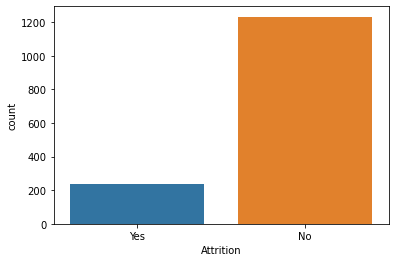

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
# check distribution for target variable
sns.countplot(x = 'Attrition', data = df);
plt.savefig('attrition.png')

Data is imbalance so we have to balance it later

In [57]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [58]:
#there is no null values we can continue

In [59]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [61]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [62]:
#we have converted object into numerical value

In [63]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [64]:
#we have to see correlation 
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

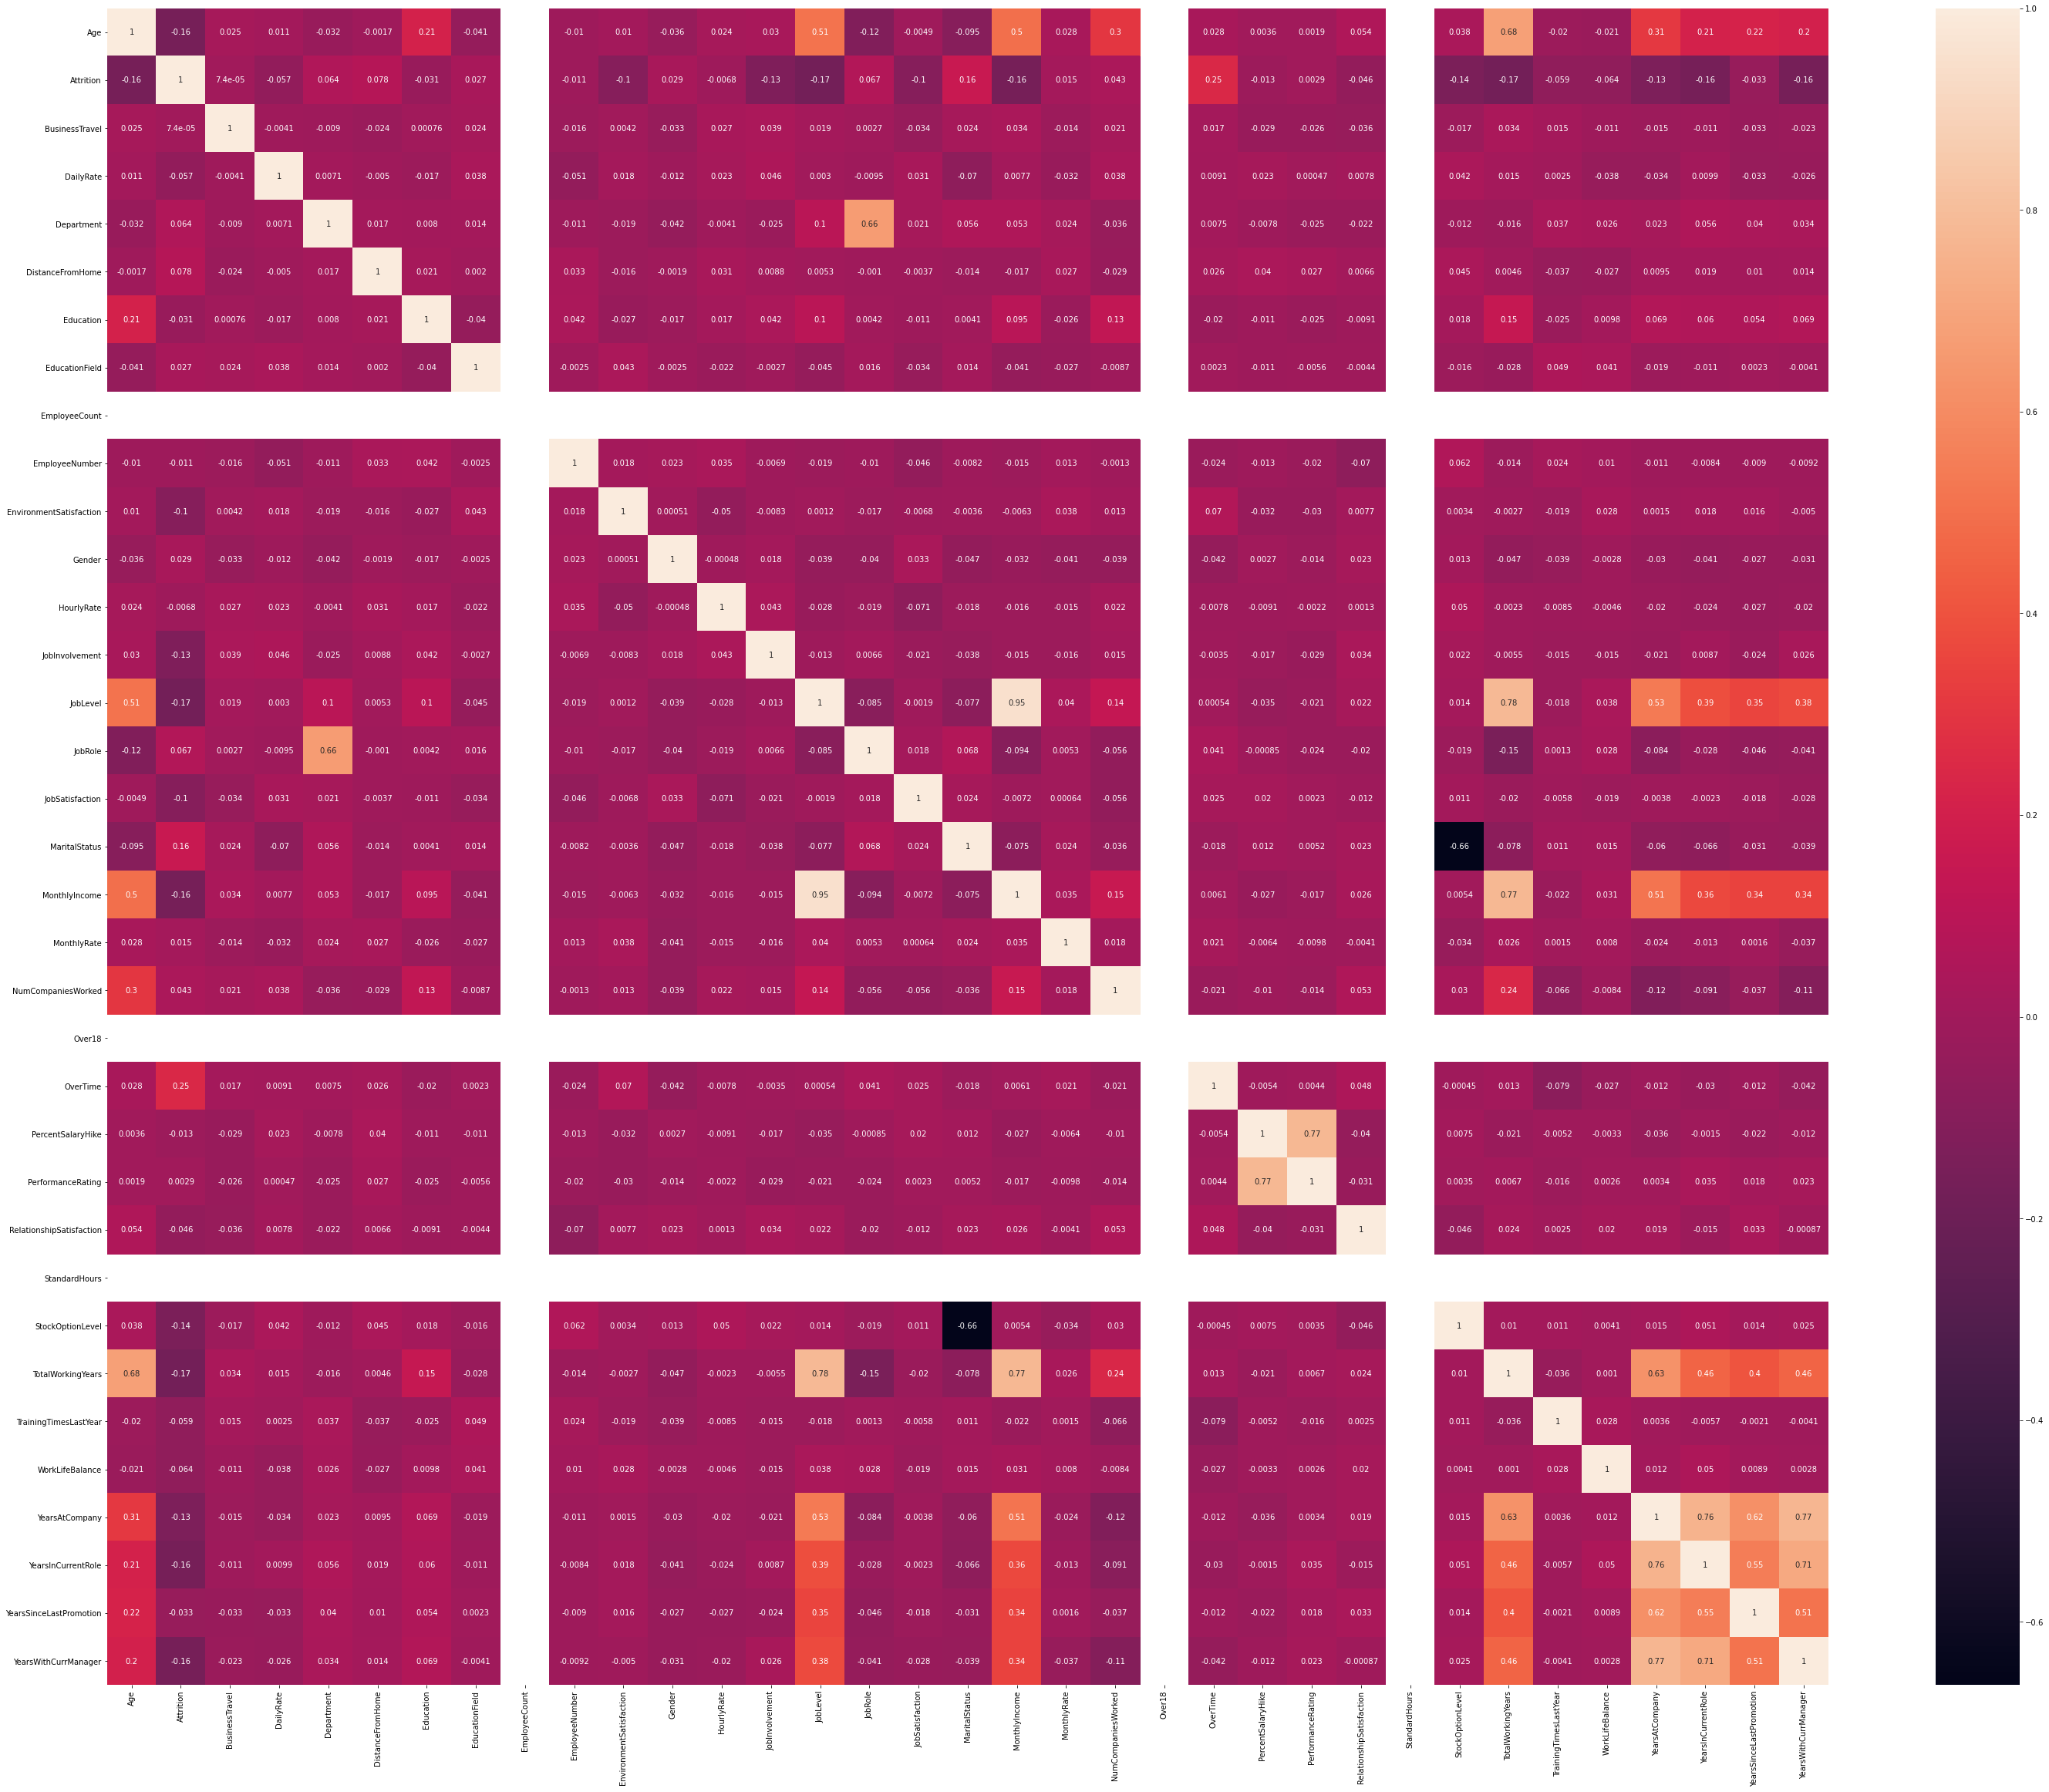

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[50,40])
sns.heatmap(data=df.corr(),annot=True)

In [66]:
df.corr()["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [67]:
#we can see from overtime to buisness travel columns are positively correlated and rest are negatively correlated.we have to drop columns which not correlated

In [68]:
df.drop(["StandardHours","Over18","EmployeeCount","EmployeeNumber"],axis=1,inplace=True)

In [69]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Age


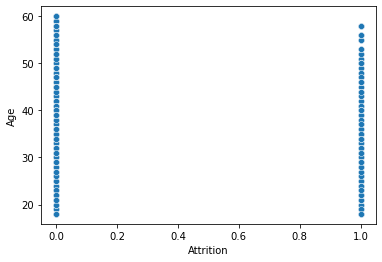

Attrition


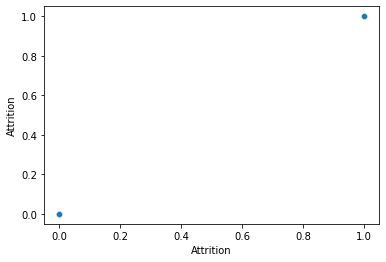

BusinessTravel


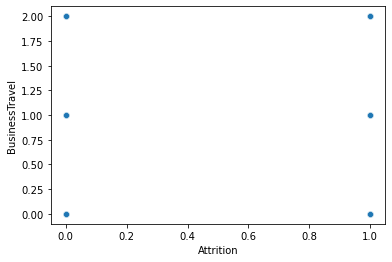

DailyRate


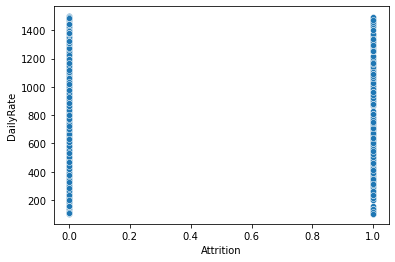

Department


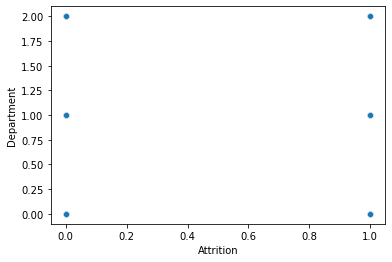

DistanceFromHome


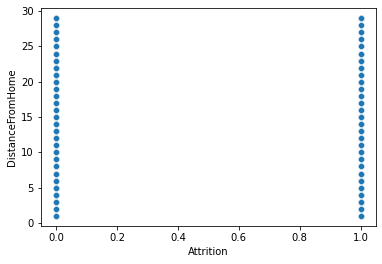

Education


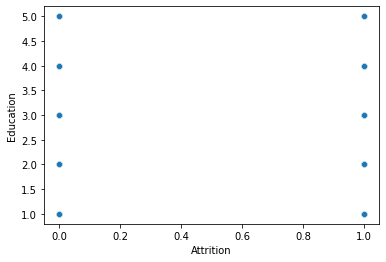

EducationField


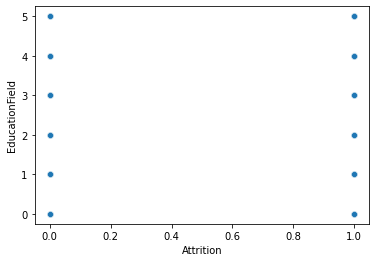

EnvironmentSatisfaction


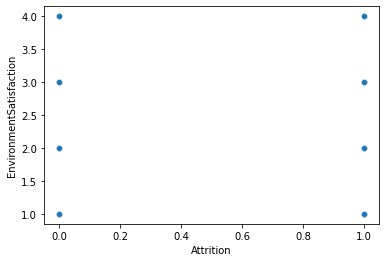

Gender


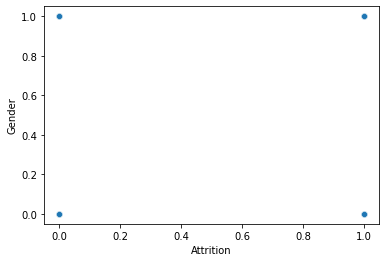

HourlyRate


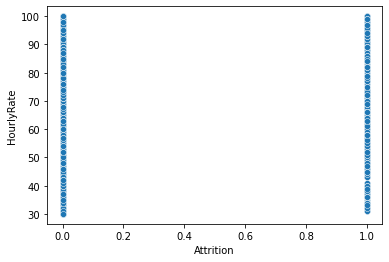

JobInvolvement


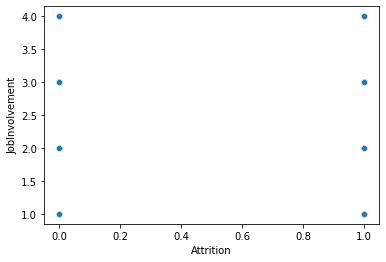

JobLevel


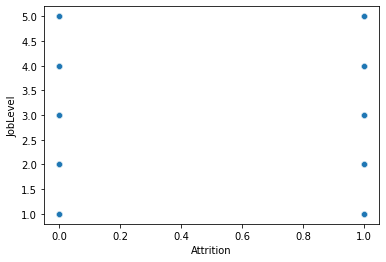

JobRole


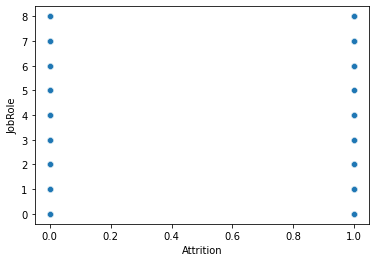

JobSatisfaction


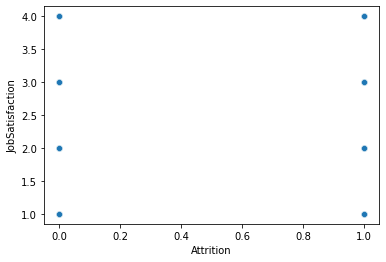

MaritalStatus


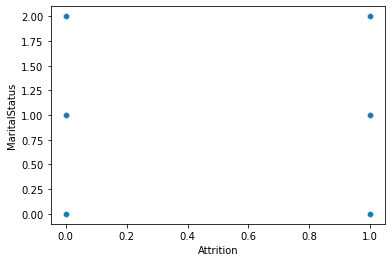

MonthlyIncome


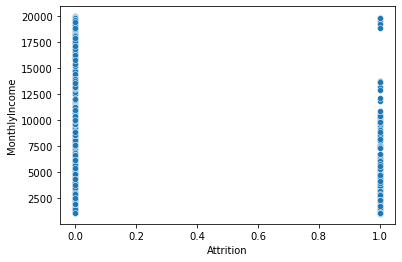

MonthlyRate


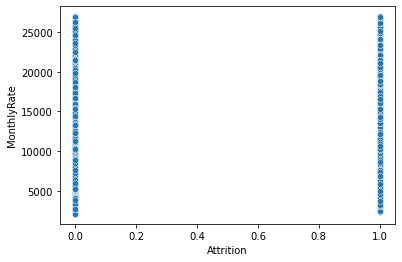

NumCompaniesWorked


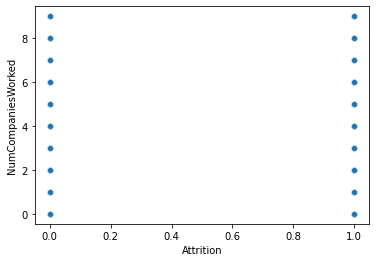

OverTime


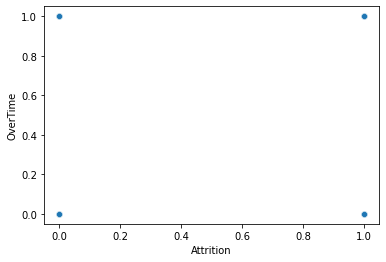

PercentSalaryHike


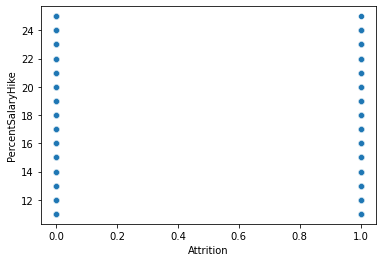

PerformanceRating


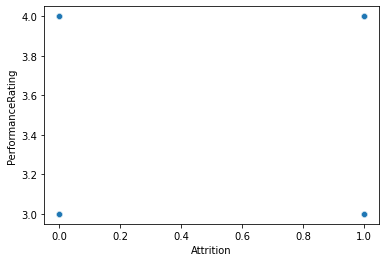

RelationshipSatisfaction


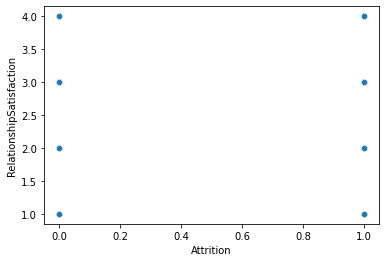

StockOptionLevel


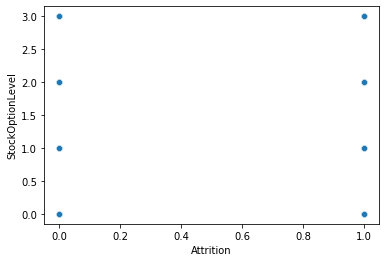

TotalWorkingYears


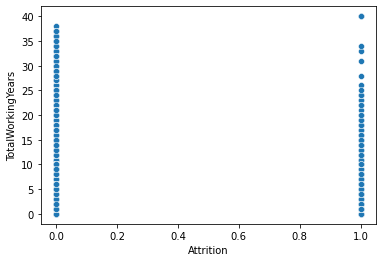

TrainingTimesLastYear


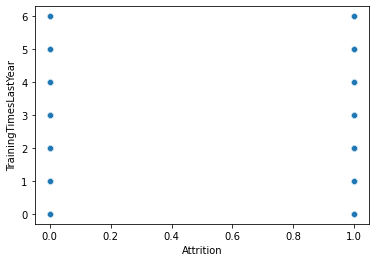

WorkLifeBalance


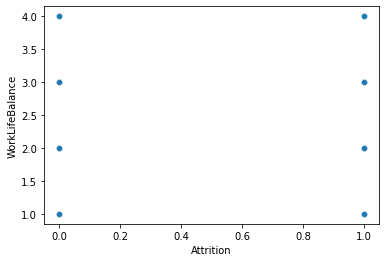

YearsAtCompany


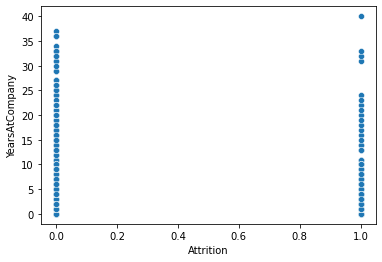

YearsInCurrentRole


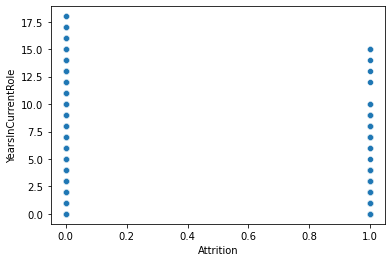

YearsSinceLastPromotion


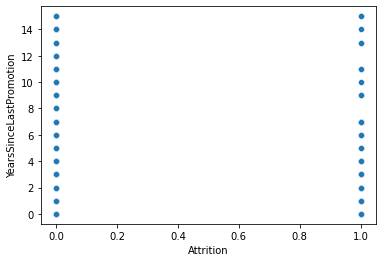

YearsWithCurrManager


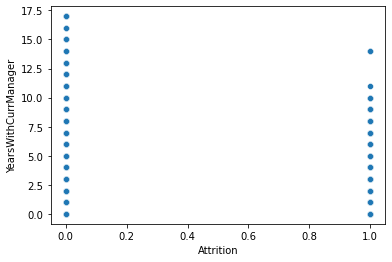

In [70]:
col=df.columns
print(col)
for i in col:
    print(i)
    plt.figure()
    sns.scatterplot(data=df,x='Attrition',y=i)
    plt.show()

In [71]:
#we can see through graps they have some correlation

<function matplotlib.pyplot.show(close=None, block=None)>

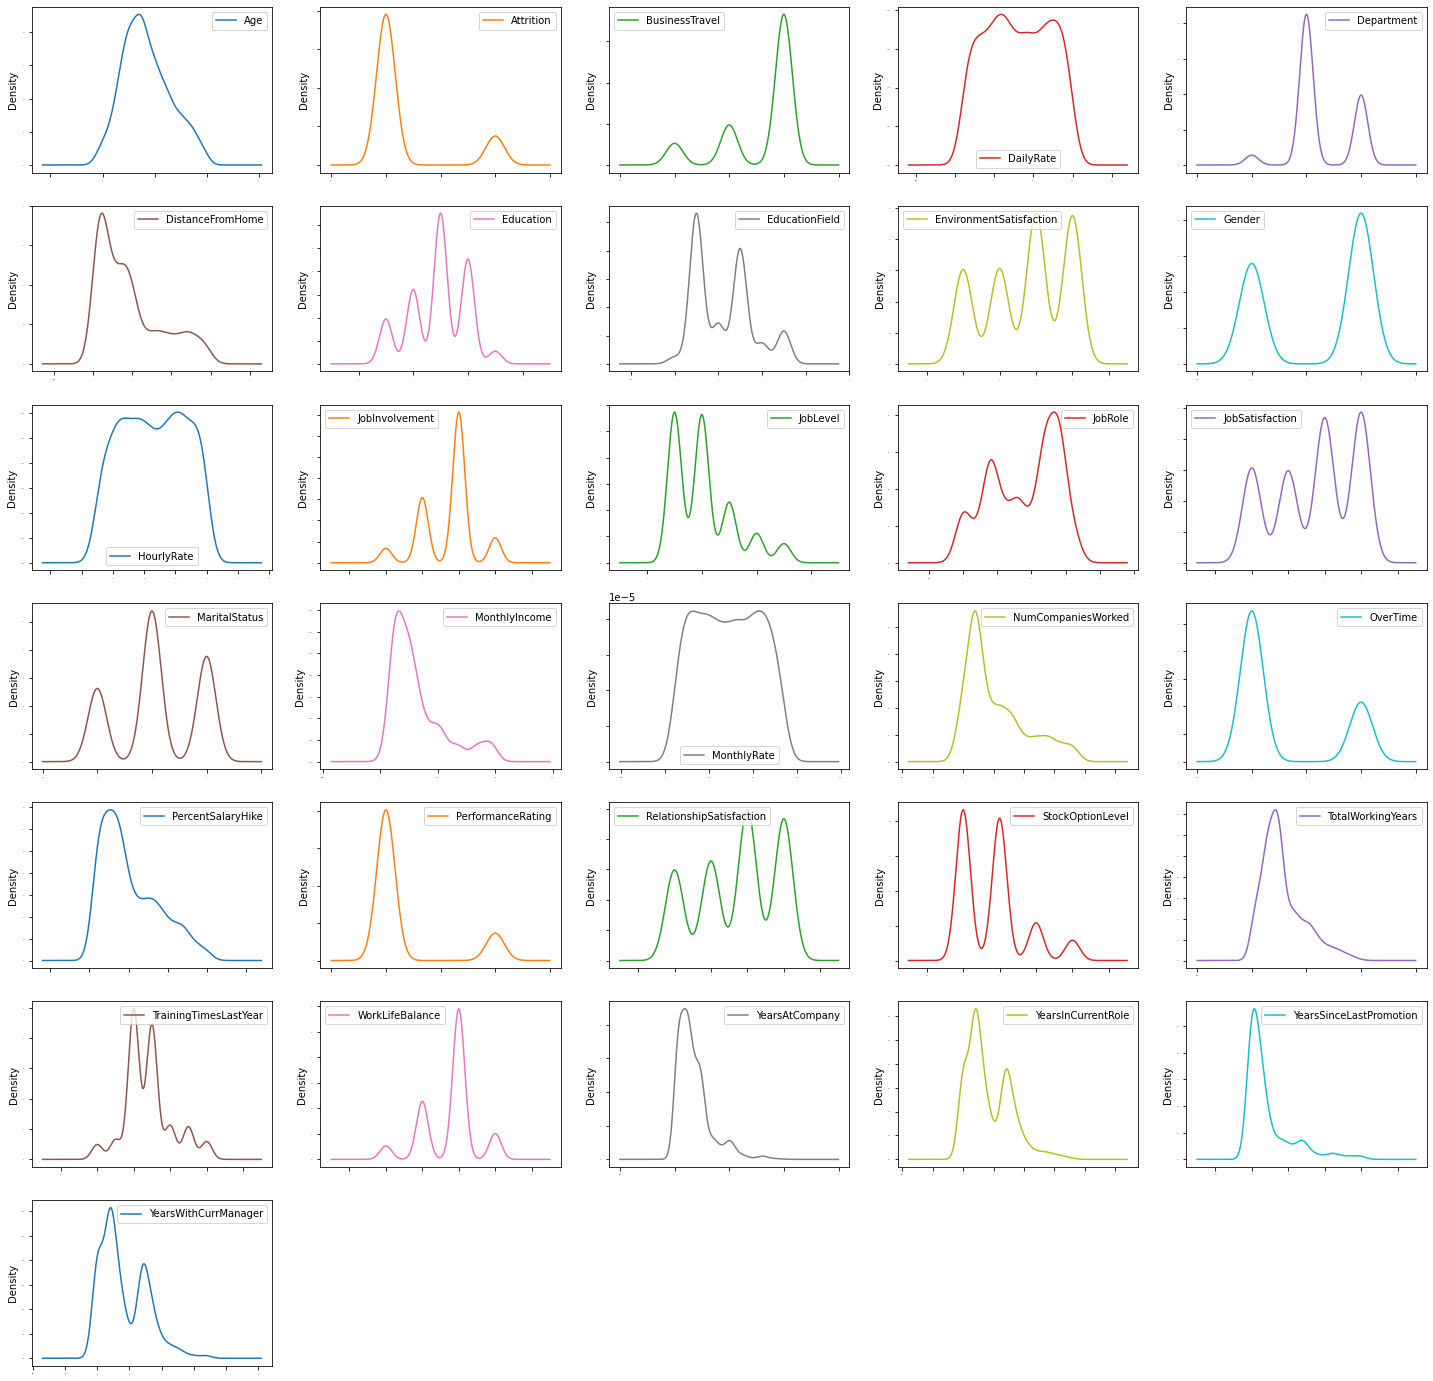

In [72]:
df.plot(kind="density",subplots=True,layout=(7,5),sharex=False,fontsize=1,figsize=(25,25))
plt.show

In [73]:
#ther are not distributed normally

In [74]:
df.shape

(1470, 31)

In [75]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [76]:
#we have remove skewness of this columns

In [77]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


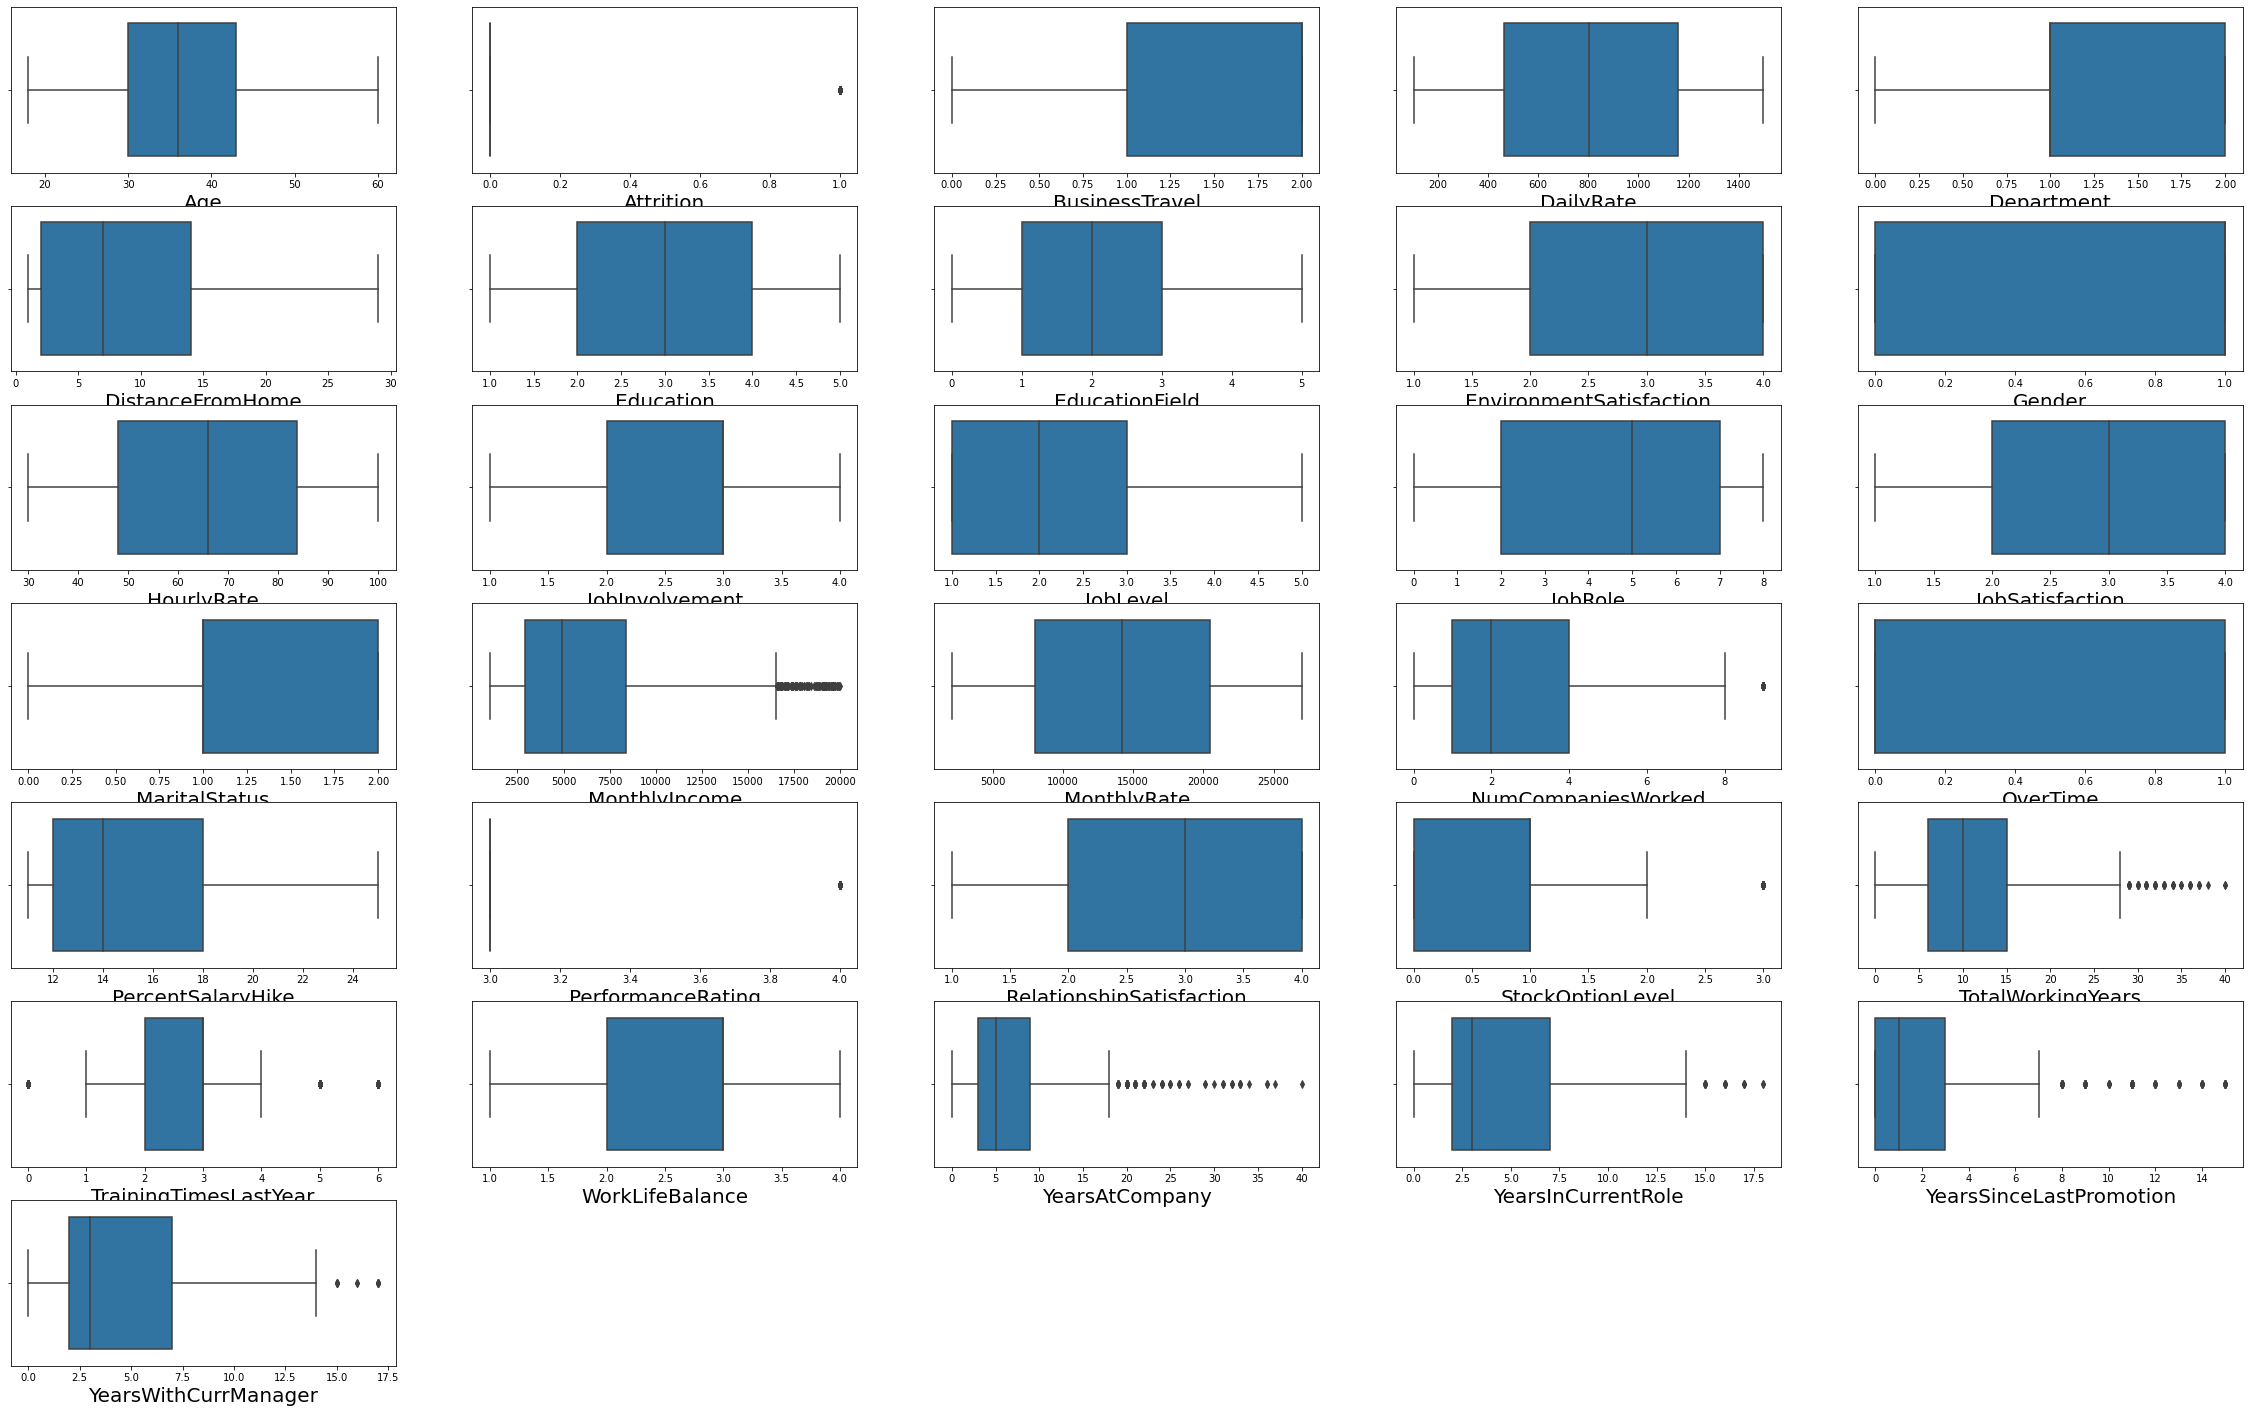

In [78]:
#plotting box plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=34:
            ax = plt.subplot(7,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [79]:
#now we have to remove outlier with zscore method

In [80]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [81]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [82]:
df_new.shape

(1387, 31)

In [83]:
data_loss=((1470-1387)/1470)*100

In [84]:
data_loss

5.646258503401361

In [85]:
#we have removed outlier and our data loss is also less se we can continue with this data

In [86]:
x=df_new.drop("Attrition",axis=1)
y=df_new["Attrition"]

In [87]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.850568,Age
1,1.014106,BusinessTravel
2,1.029494,DailyRate
3,2.062034,Department
4,1.019457,DistanceFromHome
5,1.061558,Education
6,1.021559,EducationField
7,1.021370,EnvironmentSatisfaction
8,1.023993,Gender
9,1.022001,HourlyRate


In [89]:
#as we see JobLevel and MonthlyIncome have high vif values so we have to drop that columns

In [90]:
x.drop(["JobLevel","MonthlyIncome"],axis=1,inplace=True)

In [91]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.011249,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,-0.145521,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-0.887573,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.763898,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-0.887573,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626


In [92]:
x.shape

(1387, 28)

In [93]:
y.shape

(1387,)

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [95]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [96]:
#we have to balanced dataset for our label 

In [97]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 913, 1.0: 196})
The number of classes after fit Counter({0.0: 913, 1.0: 684})


In [98]:
y_train_ns.value_counts()

0.0    913
1.0    684
Name: Attrition, dtype: int64

In [99]:
#now we have to input models to get accuracy

In [104]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 77.33812949640287
[[192  53]
 [ 10  23]]
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       245
         1.0       0.30      0.70      0.42        33

    accuracy                           0.77       278
   macro avg       0.63      0.74      0.64       278
weighted avg       0.87      0.77      0.81       278



In [105]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train_ns,y_train_ns)
y_pred = rfc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  87.76978417266187
[[239   6]
 [ 28   5]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93       245
         1.0       0.45      0.15      0.23        33

    accuracy                           0.88       278
   macro avg       0.67      0.56      0.58       278
weighted avg       0.84      0.88      0.85       278



In [106]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)
y_pred = knn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  71.94244604316546
[[191  54]
 [ 24   9]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       245
         1.0       0.14      0.27      0.19        33

    accuracy                           0.72       278
   macro avg       0.52      0.53      0.51       278
weighted avg       0.80      0.72      0.75       278



In [107]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
y_pred = dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy  76.97841726618705
[[207  38]
 [ 26   7]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       245
         1.0       0.16      0.21      0.18        33

    accuracy                           0.77       278
   macro avg       0.52      0.53      0.52       278
weighted avg       0.80      0.77      0.78       278



In [108]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
y_pred = gb.predict(x_test)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy  86.6906474820144
[[225  20]
 [ 17  16]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       245
         1.0       0.44      0.48      0.46        33

    accuracy                           0.87       278
   macro avg       0.69      0.70      0.69       278
weighted avg       0.87      0.87      0.87       278



In [109]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(rfc, x, y, cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

scr=cross_val_score(knn, x, y, cv=5)
print ("Cross validation score of knn model :",scr.mean())
      
scr=cross_val_score(gb, x, y, cv=5)
print ("Cross validation score of gb model :",scr.mean())


Cross validation score of Logistic Regression model : 0.870942523959172
Cross validation score of Random Forest model : 0.8478741916214322
Cross validation score of knn model : 0.8471547671610005
Cross validation score of gb model : 0.8608524011116018


In [110]:
#we conclude that random forestregressor has better acuuracy now we have to do Hypertuning to get good accuracy

In [111]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state = 6,shuffle=True)


In [112]:
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [115]:
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [116]:
lr_res = grid_lr.cv_results_

In [117]:
best_lr_model = grid_lr.best_estimator_
best_lr_model

LogisticRegression(C=0.05)

In [118]:
grid_lr.best_score_

0.8647174447174448

In [119]:
#we will use roc auc curve

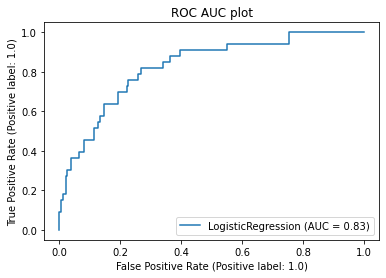

In [120]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve (grid_lr.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [ ]:
#our accuracy is 83% through randomforestregressor